# Finding the arbitrage equation and the parameters to set

To get the arbitrage equation : 

$$ max \sum_{s=0}^{\infty} (\frac{1}{1+r})^s D_{t+s} $$

s.t.

$$ D_t = F(K_t) -pC(I_t,K_t) $$
$$ K_{t+1} = I_t + (1- \delta)K_t $$
$$ I_t + C(I_t, K_t) ≤ F(K_t) $$

where the last constraint has been added to represent the fact that the investment is constrained by a binding constraint for small levels of capital.

$$ \mathcal L =  \sum_{s=0}^{\infty} (\frac{1}{1+r})^s D_{t+s} + \lambda_{t+s} (D_{t+s} - F(K_{t+s}) + pC(I_{t+s}, K_{t+s})) +  \mu_{t+s}(K_{t+1+s} - I_{t+s} - (1- \delta)K_{t+s}) + \nu_{t+s}(F(K_{t+s}) - I_{t+s} - C(I_{t+s}, K_{t+s})) $$

Using :

$$ F(K) = zK $$
$$p_t =1$$ 
$$ C(I,K) = I + \frac{1}{2} I^2 $$

We get the following FOC :

$$ 0 = \lambda_{t+s} + (\frac{1}{1+r})^s; \; \; \; \; \forall s ≥ 0; \; t ≥ 0$$
$$ 0 = \lambda_{t+s} p(1+I_{t+s}) - \mu_{t+s} - \nu_{t+s}(2+I_{t+s}); \; \; \; \; \forall s ≥ 0; \; t ≥ 0$$
$$ 0 = -  \lambda_{t+s} z + \mu_{t+s-1} - (1-\delta) \mu_{t+s} + \nu_{t+s}z; \; \; \; \; \forall s ≥ 0; \; t ≥ 1$$
$$ K_{t+1} = I_t + (1-\delta)K_t; \; \; \; \; \forall t ≥ 0$$
$$ 2I_t + \frac{1}{2} I_t^2 ≤ zK_t; \; \; \; \; \forall t ≥ 0$$


Then two cases are possible :

- (i) either the constraint on the investment is saturated
- (ii) or the Lagrange multiplier is null : $ \nu_t = 0 $

### Case 1 : the constraint on the investment is saturated :

$$ I^2 + 4I - 2zK = 0$$

Looking for the roots of the polynomial :

$$ I_{12} = \frac{-4 \pm \sqrt{16+8zK}}{2} = -2 \mp \sqrt{4+2zK} $$

We have also :

$$ K_{t+1} = I_t + (1-\delta) K_t $$

### Case 2 : the constraint is not saturated : $ \nu_t = 0; \; \; \; \forall t ≥ 0$

Then : 

$$ \mu_{t+s} = -(\frac{1}{1+r})^s p (1+I_{t+s}); \; \; \; \; \forall s ≥ 0; \; t ≥ 0 $$

Thus (by the third FOC), we find the arbitrage equation :

$$ z - (1+r)p(1+I_{t-1}) + (1-\delta)p(1+I_t) = 0; \; \; \; \; \forall s ≥ 0; \; t ≥ 1 $$

We can then find the steady state :

$$ z - (1+r)p(1+I_{SS}) + (1-\delta)p(1+I_{SS}) = 0 \Rightarrow I_{SS} = -1 + \frac{z}{p(\delta + r)}$$ 

$$ K_{SS} = I_{SS} + (1-\delta)K_{SS} \Rightarrow K_{SS} = \frac{I_{SS}}{\delta} $$

### Finding a domain to set in the yaml file

To find the domain on which to look to see this constraint being binding, we must find the limit on $K$ that allows this constraint to be binding. To do that, we can evaluate (after a first naive resolution of the problem) the $I$ reached when the constraint stops being binding : 
$$I_{SS}  \approx 0.38$$

$$-2 + \sqrt{4+2zK_{end \; of \; saturation}} \approx 0.38 $$

Thus, with  $z = 0.45$ :

$$K_{end \; of \; saturation} \approx 1.9$$

We take $s0 = 0.5 < 1.9$, and as domain : $[K.0.025, K*1.01]$ because $K_{SS} = \frac{I_{SS}}{\delta} = 15$, and $15*0.025 < s0$. We take also $n=900$ points on the grid to get about 6 points every 0.1 step.

# Numerical resolution

In [1]:
using Dolo
using StaticArrays
using Plots

model = yaml_import("../models/az_model.yaml")

dr_global = time_iteration(model,verbose=true) 

---------------------------------------------------------------------
Time Iteration
---------------------------------------------------------------------
       n | ϵₙ=|F(xₙ,xₙ)| | ηₙ=|xₙ-xₙ₋₁| |   λₙ=ηₙ/ηₙ₋₁ |         Time
---------------------------------------------------------------------


     1 |   2.9987e-01 |   2.9987e-01 |          NaN |   4.7118e+00
------------------------------------------------------------------


Results of Time Iteration Algorithm
 * Complementarities: false
 * Discretized Process type: Dolo.DiscretizedIIDProcess
 * Decision Rule type: Dolo.CubicDR{Dolo.EmptyGrid{1}, Dolo.UCGrid{1}, 1, 1}
 * Number of iterations: 2
 * Convergence: false
   * |x - x'| < 1.0e-08: false


Long time simulation to show the evolution towards the steady state (logarithmic scale for the time) :

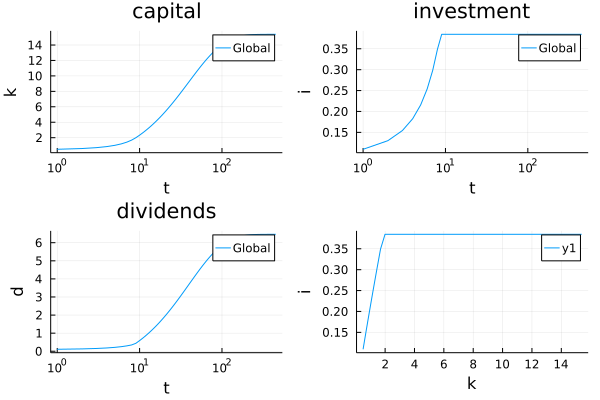

In [2]:
sim = simulate(model, dr_global.dr, T=450, s0=[0.5])

p1 = plot(sim[1,:k,:], xaxis =:log, label = "Global", title = "capital", xlabel = "t", ylabel = "k")

p2 = plot(sim[1,:i,:], xaxis = :log, label = "Global", title = "investment", xlabel = "t", ylabel = "i")

p3 = plot(sim[1,:d,:], xaxis = :log, label = "Global", title = "dividends", xlabel = "t", ylabel = "d")

p4 = plot(sim[1,:k,:],sim[1,:i,:], xlabel = "k", ylabel = "i")

plot(p1,p2,p3,p4, layout = (2,2)) 

Long term eevolution without putting a logarithmic scale for the time :

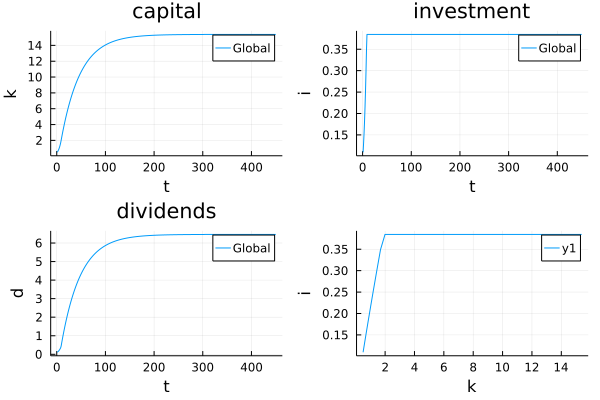

In [3]:
p1 = plot(sim[1,:k,:],label = "Global", title = "capital", xlabel = "t", ylabel = "k")

p2 = plot(sim[1,:i,:],label = "Global", title = "investment", xlabel = "t", ylabel = "i")

p3 = plot(sim[1,:d,:],label = "Global", title = "dividends", xlabel = "t", ylabel = "d")

p4 = plot(sim[1,:k,:],sim[1,:i,:], xlabel = "k", ylabel = "i")

plot(p1,p2,p3,p4, layout = (2,2)) 

Short term evolution to see the role of the constraint on the investment :

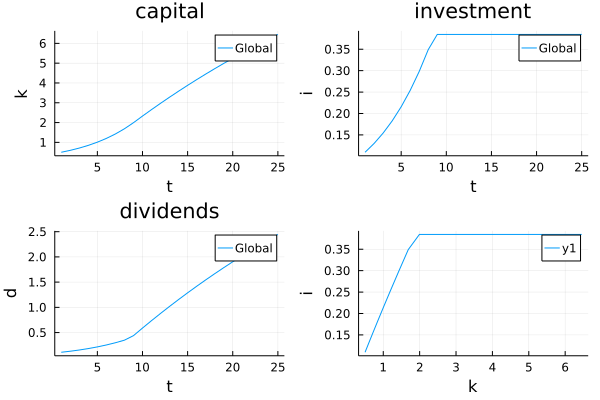

In [4]:
sim = simulate(model, dr_global.dr, T=25, s0=[0.5])

p1 = plot(sim[1,:k,:],label = "Global", title = "capital", xlabel = "t", ylabel = "k")

p2 = plot(sim[1,:i,:],label = "Global", title = "investment", xlabel = "t", ylabel = "i")

p3 = plot(sim[1,:d,:],label = "Global", title = "dividends", xlabel = "t", ylabel = "d")

p4 = plot(sim[1,:k,:],sim[1,:i,:], xlabel = "k", ylabel = "i")

plot(p1,p2,p3,p4, layout = (2,2)) 